# HW4

Justin Hoang  
CSCI 4930

### Import Dataset
Import and read the dataset. Store in a dataframe.

In [417]:
import pandas as pd

In [418]:
df = pd.read_csv("spiral-dataset.csv", index_col=None, sep=r'\s', header=None)
df.columns = ['x', 'y', 'target']

df.head()

/var/folders/pt/_3pv06z57s3_j0w3tq9l60p80000gn/T/ipykernel_53361/2051164814.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("spiral-dataset.csv", index_col=None, sep=r'\s', header=None)


,x,y,target
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


### Euclidean Distance Function
This function calculates the Euclidean distance between two points

In [419]:
import numpy as np

In [420]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2) ** 2))

### Distance Matrix Function
This function creates a matrix of distances betwen points in the dataset.

In [421]:
def distance_matrix(data):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    
    for i in range(n):
        for k in range(n):
            dist = euclidean_distance(data[i], data[k])
            dist_matrix[i][k] = dist
            dist_matrix[k][i] = dist
            
    return dist_matrix

## Linkage Function
This function will link clusters based on the link type.

In [422]:
dataset = df[list(('x', 'y'))].to_numpy()

In [423]:
def link(linktype):
    n = len(dataset)
    clusters = [[pt] for pt in range(n)] # init clusters
    initial_dists = distance_matrix(dataset) # init initial distance matrix
    cutoff = 3 # cutoff for merging
    
    while len(clusters) > cutoff:
        min_dist = float('inf')
        min_i = min_k = -1
        
        for i in range(len(clusters)):
            for k in range(i+1, len(clusters)):
                # single linkage
                if linktype == 1:
                    # find smallest distance between any two points from clsuter i and k
                    cluster_dist = min(initial_dists[pi, pk] for pi in clusters[i] for pk in clusters[k])
                # complete linkage
                elif linktype == 2:
                    # find largest distance between any two points from clsuter i and k
                    cluster_dist = max(initial_dists[pi, pk] for pi in clusters[i] for pk in clusters[k])
                # average linkage
                elif linktype == 3:
                    # compute all pairwise distances between points in cluster i and k
                    dists = [initial_dists[pi, pk] for pi in clusters[i] for pk in clusters[k]]
                    cluster_dist = np.mean(dists) # average all pairwise distances
                # centroid linkage
                elif linktype == 4:
                    # calulate centroids of clusters i and k
                    centroid_i = np.mean([dataset[pt] for pt in clusters[i]], axis=0)
                    centroid_k = np.mean([dataset[pt] for pt in clusters[k]], axis=0)
                    # compute Euclidean distance between two centroids
                    cluster_dist = euclidean_distance(centroid_i, centroid_k)
                else:
                    raise ValueError("Invalid linktype")
                
                # new minimum value found
                if cluster_dist < min_dist:
                    min_dist = cluster_dist
                    min_i, min_k = i, k
                        
        new_cluster = clusters[min_i] + clusters[min_k]

        # merge clusters
        clusters.pop(max(min_i, min_k))
        clusters.pop(min(min_i, min_k))
        clusters.append(new_cluster)
    
    print("Linktype: ", linktype)
    return clusters
                    

#### Single Linkage (1)

In [424]:
single_link = link(1)

Linktype:  1


#### Complete Linkage (2)

In [425]:
complete_link = link(2)

Linktype:  2


#### Average Linkage (3)

In [426]:
avg_link = link(3)

Linktype:  3


#### Centroid Linkage (4)

In [427]:
centroid_link = link(4)

Linktype:  4


## Plotting the Data

In [428]:
import matplotlib.pyplot as plt

#### Plot Data Function
Function plots data points for clusters

In [429]:
def plot_data(clusters):
    cluster_data_x, cluster_data_y = [[], [], []], [[], [], []]
    
    # get data points
    for i in clusters[0]:
        data = dataset[i]
        cluster_data_x[0].append(data[0])
        cluster_data_y[0].append(data[1])
        
    for i in clusters[1]:
        data = dataset[i]
        cluster_data_x[1].append(data[0])
        cluster_data_y[1].append(data[1])
        
    for i in clusters[2]:
        data = dataset[i]
        cluster_data_x[2].append(data[0])
        cluster_data_y[2].append(data[1])
        
    return cluster_data_x, cluster_data_y

#### Plot Data from Linkage Clusters

In [430]:
single_x, single_y = plot_data(single_link)
complete_x, complete_y = plot_data(complete_link)
avg_x, avg_y = plot_data(avg_link)
centroid_x, centroid_y = plot_data(centroid_link)

#### Draw the Plots

Text(0.5, 1.0, 'Centroid Linkage')

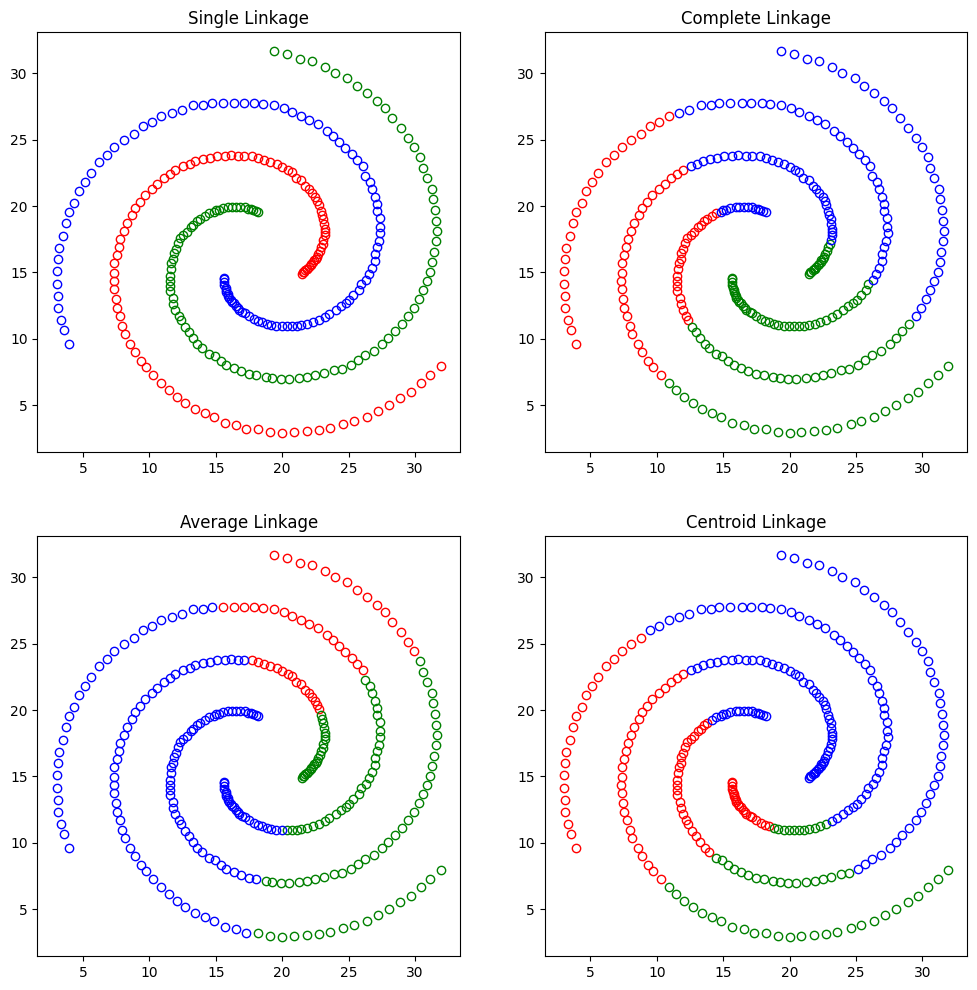

In [431]:
fig, axs = plt.subplots(2,2, figsize=(12,12))

# single linkage
axs[0,0].plot(single_x[0], single_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0,0].plot(single_x[1], single_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0,0].plot(single_x[2], single_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0,0].set_title("Single Linkage")

# complete linkage
axs[0,1].plot(complete_x[0], complete_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0,1].plot(complete_x[1], complete_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0,1].plot(complete_x[2], complete_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0,1].set_title("Complete Linkage")

# average linkage
axs[1,0].plot(avg_x[0], avg_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1,0].plot(avg_x[1], avg_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1,0].plot(avg_x[2], avg_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1,0].set_title("Average Linkage")

# centroid linkage
axs[1,1].plot(centroid_x[0], centroid_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1,1].plot(centroid_x[1], centroid_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1,1].plot(centroid_x[2], centroid_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1,1].set_title("Centroid Linkage")

# Statistics

In [441]:
from sklearn.metrics import rand_score, silhouette_score
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

#### Get Labels Function
Gets the labels from the clusters

In [442]:
def get_labels(clusters, n):
    labels = np.empty(n, dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = cluster_id
    return labels

#### SSE Function
Computes the SSE for the given cluster

In [443]:
def compute_sse(data, labels):
    sse = 0
    for cluster_id in np.unique(labels):
        cluster_points = data[labels == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse

## Stats

In [444]:
ground_truths = df['target'].values

#### Single Linkage Stats

In [445]:
single_labels = get_labels(single_link, len(df))
single_z = linkage(df, method='single')

single_sse = compute_sse(dataset, single_labels)
single_ri = rand_score(ground_truths, single_labels)
single_cophenet, _ = cophenet(single_z, pdist(df))
single_silhouette = silhouette_score(dataset, single_labels)

print("Single Linkage SSE: ", single_sse)
print("Single Linkage Rand Index: ", single_ri)
print("Single Linkage CCC: ", single_cophenet)
print("Single Linkage Silhouette Score: ", single_silhouette)

Single Linkage SSE:  30109.350350293113
Single Linkage Rand Index:  1.0
Single Linkage CCC:  0.08200732873993676
Single Linkage Silhouette Score:  0.0013442973442780192


#### Complete Linkage Stats

In [446]:
complete_labels = get_labels(complete_link, len(df))
complete_z = linkage(df, method='complete')

complete_sse = compute_sse(dataset, complete_labels)
complete_ri = rand_score(ground_truths, complete_labels)
complete_cophenet, _ = cophenet(complete_z, pdist(df))
complete_silhouette = silhouette_score(dataset, complete_labels)

print("Complete Linkage SSE: ", complete_sse)
print("Complete Linkage Rand Index: ", complete_ri)
print("Complete Linkage CCC: ", complete_cophenet)
print("Complete Linkage Silhouette Score: ", complete_silhouette)

Complete Linkage SSE:  13004.37423028962
Complete Linkage Rand Index:  0.5536730150878061
Complete Linkage CCC:  0.5967496305382395
Complete Linkage Silhouette Score:  0.34553575996045643


#### Average Linkage Stats

In [447]:
avg_labels = get_labels(avg_link, len(df))
avg_z = linkage(df, method='average')

avg_sse = compute_sse(dataset, avg_labels)
avg_ri = rand_score(ground_truths, avg_labels)
avg_cophenet, _ = cophenet(avg_z, pdist(df))
avg_silhouette = silhouette_score(dataset, avg_labels)

print("Complete Linkage SSE: ", avg_sse)
print("Complete Linkage Rand Index: ", avg_ri)
print("Complete Linkage CCC: ", complete_cophenet)
print("Complete Linkage Silhouette Score: ", avg_silhouette)

Complete Linkage SSE:  14132.153816169086
Complete Linkage Rand Index:  0.5366064803363839
Complete Linkage CCC:  0.5967496305382395
Complete Linkage Silhouette Score:  0.31852406062753236


#### Centroid Linkage Stats

In [448]:
centroid_labels = get_labels(centroid_link, len(df))
centroid_z = linkage(df, method='centroid')

centroid_sse = compute_sse(dataset, centroid_labels)
centroid_ri = rand_score(ground_truths, centroid_labels)
centroid_cophenet, _ = cophenet(centroid_z, pdist(df))
centroid_silhouette = silhouette_score(dataset, centroid_labels)

print("Complete Linkage SSE: ", centroid_sse)
print("Complete Linkage Rand Index: ", centroid_ri)
print("Complete Linkage CCC: ", complete_cophenet)
print("Complete Linkage Silhouette Score: ", centroid_silhouette)

Complete Linkage SSE:  14636.189316068201
Complete Linkage Rand Index:  0.5422334899826862
Complete Linkage CCC:  0.5967496305382395
Complete Linkage Silhouette Score:  0.30554536215869454
